In [8]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import great_circle
pd.options.display.max_columns=999


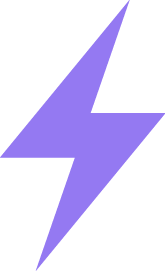

Running local mode, some functionality limited.



In [3]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [4]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [5]:
northamerica = pd.read_csv('northamericacomplete.csv')

In [6]:
northamerica.columns

Index(['Name', 'State/Estado/Province', 'Country',
       'Distance to closest larger city (KM)', '60 cities Region 190 km',
       '60 cities Region 380 km', '60 cities Region 475 km',
       '100 cities Region 190 km', 'Population Rank', 'Rank Power',
       'Population', 'Population PSAPower', 'Rolling population total',
       'Rolling Population Percent', 'Priority Score',
       'Estimated cost (http://www.worldbank.org/en/news/press-release/2014/07/10/cost-of-high-speed-rail-in-china-one-third-lower-than-in-other-countries)',
       'Ticket price',
       'Estimated revenue (0.1% of city rides the train per month)',
       'Payoff time in years',
       'Politics 1 for Democrat, -1 for Republican, 2 for swing',
       'Governor party D+ R-',
       'Highest-ranked university ranking (US News) (200=0)',
       'GDP per capita of State', 'Closest National Park (KM)',
       'Distance from a foreign country (KM)', 'Score',
       'If part of a larger city's transportation, city nam

In [9]:
northamerica

Name      State/Estado/Province        Country  \
0                 St. John's  Newfoundland and Labrador         Canada   
1       Conception Bay South  Newfoundland and Labrador         Canada   
2                Cape Breton                Nova Scotia         Canada   
3              Charlottetown       Prince Edward Island         Canada   
4                    Halifax                Nova Scotia         Canada   
5                    Moncton              New Brunswick         Canada   
6                 Saint John              New Brunswick         Canada   
7                Fredericton              New Brunswick         Canada   
8                     Bangor                      Maine  United States   
9                    Augusta                      Maine  United States   
10                  Portland                      Maine  United States   
11            Vineyard Haven              Massachusetts  United States   
12                    Boston              Massachusetts  United States   
13                  Saguenay                     Quebec         Canada   
14               Quebec City                     Quebec         Canada   
15                    Berlin              New Hampshire  United States   
16                Sherbrooke                     Quebec         Canada   
17                     Keene              New Hampshire  United States   
18                 Claremont              New Hampshire  United States   
19               Springfield              Massachusetts  United States   
20               Springfield                   Missouri  United States   
21             Drummondville                     Quebec         Canada   
22                     Barre                    Vermont  United States   
23            Trois-Rivieres                     Quebec         Canada   
24                  Hartford                Connecticut  United States   
25                    Granby                     Quebec         Canada   
26                   Rutland                    Vermont  United States   
27                Burlington                    Vermont  United States   
28                Bennington                    Vermont  United States   
29                Pittsfield              Massachusetts  United States   
..                       ...                        ...            ...   
663                 Portland                     Oregon  United States   
664            Prince George           British Columbia         Canada   
665                  Medford                     Oregon  United States   
666                   Eugene                     Oregon  United States   
667                Vancouver           British Columbia         Canada   
668                    Ukiah                 California  United States   
669                 Roseburg                     Oregon  United States   
670                 Victoria           British Columbia         Canada   
671             Port Angeles                 Washington  United States   
672                   Duncan           British Columbia         Canada   
673                 Aberdeen                 Washington  United States   
674                  Astoria                     Oregon  United States   
675                  Nanaimo           British Columbia         Canada   
676                  Newport                     Oregon  United States   
677                   Eureka                 California  United States   
678            Crescent City                 California  United States   
679                 Coos Bay                     Oregon  United States   
680                Brookings                     Oregon  United States   
681               Parksville           British Columbia         Canada   
682                Courtenay           British Columbia         Canada   
683           Campbell River           British Columbia         Canada   
684                Ketchikan                     Alaska  United States   
685                   Juneau

In [11]:
df = northamerica[['Name','State/Estado/Province','Country','Population','Latitude','Longitude']]
df.head()

Name      State/Estado/Province Country  Population  \
0            St. John's  Newfoundland and Labrador  Canada      205955   
1  Conception Bay South  Newfoundland and Labrador  Canada       26199   
2           Cape Breton                Nova Scotia  Canada       98722   
3         Charlottetown       Prince Edward Island  Canada       69325   
4               Halifax                Nova Scotia  Canada      403390   

   Latitude  Longitude  
0    47.550     52.700  
1    47.500     53.000  
2    46.150     60.750  
3    46.250     63.100  
4    44.515     63.506

In [12]:
canada=df[df['Country']=='Canada']
canada['Population'].sum()

26722588

In [13]:
canada.sort_values('Population',ascending=False)

Name      State/Estado/Province Country  \
88                        Toronto                    Ontario  Canada   
30                       Montreal                     Quebec  Canada   
667                     Vancouver           British Columbia  Canada   
604                       Calgary                    Alberta  Canada   
41                         Ottawa             Ontario/Quebec  Canada   
599                      Edmonton                    Alberta  Canada   
14                    Quebec City                     Quebec  Canada   
428                      Winnipeg                   Manitoba  Canada   
97                       Hamilton                    Ontario  Canada   
111  Kitchener-Cambridge-Waterloo                    Ontario  Canada   
123                        London                    Ontario  Canada   
85                St. Catherine's                    Ontario  Canada   
4                         Halifax                Nova Scotia  Canada   
76                         Oshawa                    Ontario  Canada   
670                      Victoria           British Columbia  Canada   
163                       Windsor                    Ontario  Canada   
560                     Saskatoon               Saskatchewan  Canada   
540                        Regina               Saskatchewan  Canada   
16                     Sherbrooke                     Quebec  Canada   
0                      St. John's  Newfoundland and Labrador  Canada   
91                         Barrie                    Ontario  Canada   
635                       Kelowna           British Columbia  Canada   
658                    Abbotsford           British Columbia  Canada   
119                       Sudbury                    Ontario  Canada   
49                       Kingston                    Ontario  Canada   
13                       Saguenay                     Quebec  Canada   
23                 Trois-Rivieres                     Quebec  Canada   
106                        Guelph                    Ontario  Canada   
5                         Moncton              New Brunswick  Canada   
107                     Brantford                    Ontario  Canada   
..                            ...                        ...     ...   
69                   Peterborough                    Ontario  Canada   
292                   Thunder Bay                    Ontario  Canada   
597                    Lethbridge                    Alberta  Canada   
675                       Nanaimo           British Columbia  Canada   
641                      Kamloops           British Columbia  Canada   
58                     Belleville                    Ontario  Canada   
145                  Chatham-Kent                    Ontario  Canada   
7                     Fredericton              New Brunswick  Canada   
656                    Chilliwack           British Columbia  Canada   
601                      Red Deer                    Alberta  Canada   
2                     Cape Breton                Nova Scotia  Canada   
146                        Sarnia                    Ontario  Canada   
21                  Drummondville                     Quebec  Canada   
664                 Prince George           British Columbia  Canada   
25                         Granby                     Quebec  Canada   
580                  Medicine Hat                    Alberta  Canada   
75                 Kawartha Lakes                    Ontario  Canada   
627                Grande Prairie                    Alberta  Canada   
632                        Vernon           British Columbia  Canada   
3                   Charlottetown       Prince Edward Island  Canada   
682                     Courtenay           British Columbia  Canada   
672                        Duncan           British Columbia  Canada   
636                     Penticton           British Columbia  Canada   
683                Campbell River           British Columbia  Canada 

In [14]:
population=canada['Population'].sum()
canada['Latpop'] = canada['Population']*canada['Latitude']
canada['Lonpop']=canada['Population']*canada['Longitude']
canada.head()

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Name      State/Estado/Province Country  Population  \
0            St. John's  Newfoundland and Labrador  Canada      205955   
1  Conception Bay South  Newfoundland and Labrador  Canada       26199   
2           Cape Breton                Nova Scotia  Canada       98722   
3         Charlottetown       Prince Edward Island  Canada       69325   
4               Halifax                Nova Scotia  Canada      403390   

   Latitude  Longitude       Latpop       Lonpop  
0    47.550     52.700   9793160.25  10853828.50  
1    47.500     53.000   1244452.50   1388547.00  
2    46.150     60.750   4556020.30   5997361.50  
3    46.250     63.100   3206281.25   4374407.50  
4    44.515     63.506  17956905.85  25617685.34

In [15]:
canada['Latpop'].sum()/population

46.46488379253163

In [16]:
canada['Lonpop'].sum()/population

88.69871528149602

In [21]:
def centerofpopulation(country):
    canada=df[df['Country']==country]
    population=canada['Population'].sum()
    canada['Latpop'] = canada['Population']*canada['Latitude']
    canada['Lonpop']=canada['Population']*canada['Longitude']
    d = dict()
    d['Latitude'] = canada['Latpop'].sum()/population
    d['Longitude'] = canada['Lonpop'].sum()/population
    return(d)
centerofpopulation('Mexico')

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


{'Latitude': 21.666725287706207, 'Longitude': 100.57934017933027}

In [27]:
northamerica[northamerica['Country']=='Canada'][['Name','State/Estado/Province','Country','Population','Latitude','Longitude']].sort_values('Population',ascending=False)

Name      State/Estado/Province Country  \
88                        Toronto                    Ontario  Canada   
30                       Montreal                     Quebec  Canada   
667                     Vancouver           British Columbia  Canada   
604                       Calgary                    Alberta  Canada   
41                         Ottawa             Ontario/Quebec  Canada   
599                      Edmonton                    Alberta  Canada   
14                    Quebec City                     Quebec  Canada   
428                      Winnipeg                   Manitoba  Canada   
97                       Hamilton                    Ontario  Canada   
111  Kitchener-Cambridge-Waterloo                    Ontario  Canada   
123                        London                    Ontario  Canada   
85                St. Catherine's                    Ontario  Canada   
4                         Halifax                Nova Scotia  Canada   
76                         Oshawa                    Ontario  Canada   
670                      Victoria           British Columbia  Canada   
163                       Windsor                    Ontario  Canada   
560                     Saskatoon               Saskatchewan  Canada   
540                        Regina               Saskatchewan  Canada   
16                     Sherbrooke                     Quebec  Canada   
0                      St. John's  Newfoundland and Labrador  Canada   
91                         Barrie                    Ontario  Canada   
635                       Kelowna           British Columbia  Canada   
658                    Abbotsford           British Columbia  Canada   
119                       Sudbury                    Ontario  Canada   
49                       Kingston                    Ontario  Canada   
13                       Saguenay                     Quebec  Canada   
23                 Trois-Rivieres                     Quebec  Canada   
106                        Guelph                    Ontario  Canada   
5                         Moncton              New Brunswick  Canada   
107                     Brantford                    Ontario  Canada   
..                            ...                        ...     ...   
69                   Peterborough                    Ontario  Canada   
292                   Thunder Bay                    Ontario  Canada   
597                    Lethbridge                    Alberta  Canada   
675                       Nanaimo           British Columbia  Canada   
641                      Kamloops           British Columbia  Canada   
58                     Belleville                    Ontario  Canada   
145                  Chatham-Kent                    Ontario  Canada   
7                     Fredericton              New Brunswick  Canada   
656                    Chilliwack           British Columbia  Canada   
601                      Red Deer                    Alberta  Canada   
2                     Cape Breton                Nova Scotia  Canada   
146                        Sarnia                    Ontario  Canada   
21                  Drummondville                     Quebec  Canada   
664                 Prince George           British Columbia  Canada   
25                         Granby                     Quebec  Canada   
580                  Medicine Hat                    Alberta  Canada   
75                 Kawartha Lakes                    Ontario  Canada   
627                Grande Prairie                    Alberta  Canada   
632                        Vernon           British Columbia  Canada   
3                   Charlottetown       Prince Edward Island  Canada   
682                     Courtenay           British Columbia  Canada   
672                        Duncan           British Columbia  Canada   
636                     Penticton           British Columbia  Canada   
683                Campbell River           British Columbia  Canada 